In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense,BatchNormalization,Input
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

2024-06-19 05:17:53.021411: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-19 05:17:53.021578: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-19 05:17:53.187002: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data=pd.read_csv('/kaggle/input/second-hand-used-cars-data-set-linear-regression/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v.id           1000 non-null   int64  
 1   on road old    1000 non-null   int64  
 2   on road now    1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [4]:
data.drop('v.id',axis=1,inplace=True)

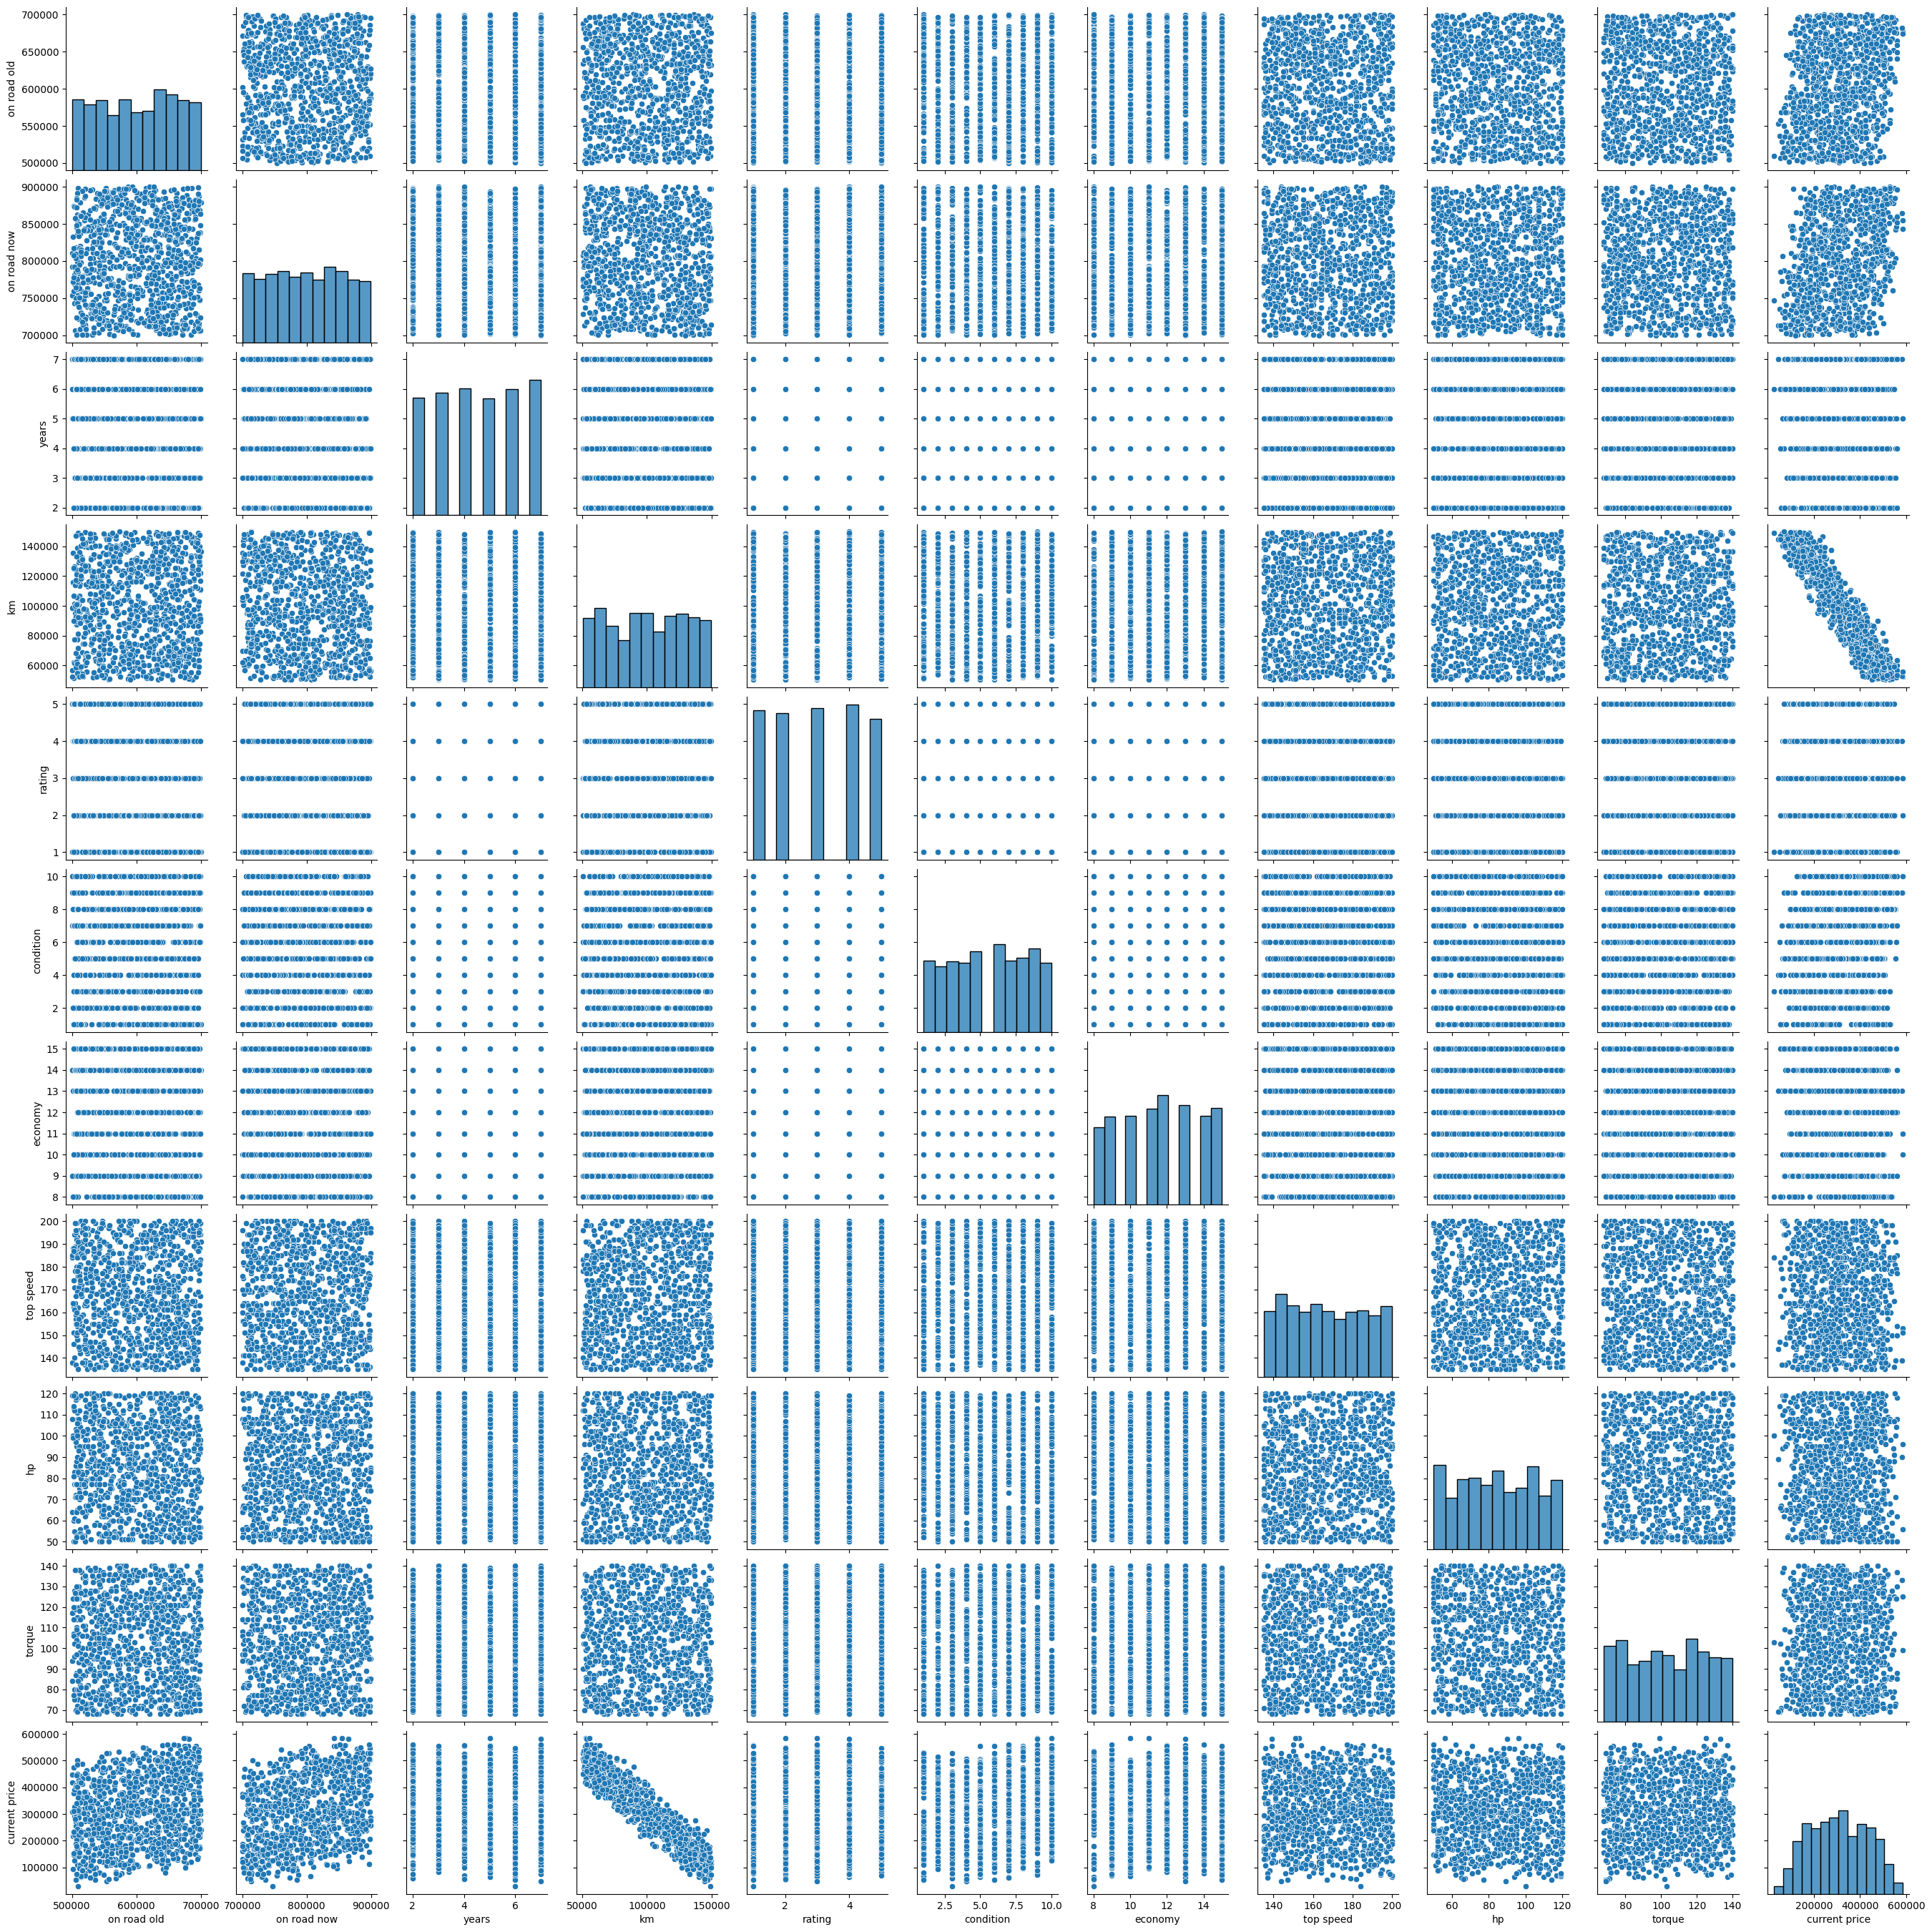

In [5]:
sb.pairplot(data)

In [6]:
data=tf.constant(data)
scaler_1=StandardScaler()
scaler_2=StandardScaler()

In [7]:
shuffled_data=tf.random.shuffle(data)

In [8]:
x_data=shuffled_data[:,:-1]
y_data=shuffled_data[:,-1]

In [9]:
train_limit=800
train_x=scaler_1.fit_transform(x_data[:train_limit])
test_x=scaler_1.transform(x_data[train_limit:])
train_y=scaler_2.fit_transform(tf.expand_dims(y_data[:train_limit],axis=1))
test_y=y_data[train_limit:]

In [10]:
input_shape=train_x[0].shape

In [11]:
i=Input(shape=input_shape)
x=BatchNormalization()(i)
x=Dense(1)(x)

In [12]:
model=Model(i,x)

In [13]:
model.compile(loss='mse',optimizer='adam')

In [14]:
model.fit(train_x,train_y,validation_split=0.2,epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.7959 - val_loss: 3.3746
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5443 - val_loss: 3.1345
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3092 - val_loss: 2.9107
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7109 - val_loss: 2.7096
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6975 - val_loss: 2.5212
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.4197 - val_loss: 2.3532
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2041 - val_loss: 2.2017
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1628 - val_loss: 2.0533
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0039 - val_loss: 1.9175
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0077 - val_loss: 1.7925
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7606 - val_loss: 1.6742
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6

In [15]:
r=model.history.history

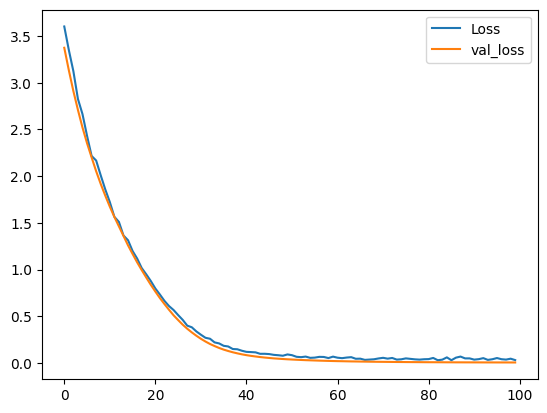

In [16]:
sb.lineplot(r['loss'],label='Loss')
sb.lineplot(r['val_loss'],label='val_loss')
plt.legend()

In [17]:
predicted=model.predict(test_x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [18]:
predicted_price=scaler_2.inverse_transform(predicted)

In [19]:
rmse=np.sqrt(mean_squared_error(test_y,predicted_price))

In [20]:
mean=np.mean(test_y)

In [21]:
print('Relative Error : ',rmse/mean)

Relative Error :  0.033143038300065215
